In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('Zoo.csv')
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


(None,
   animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
 0    aardvark     1         0     0     1         0        0         1   
 1    antelope     1         0     0     1         0        0         0   
 2        bass     0         0     1     0         0        1         1   
 3        bear     1         0     0     1         0        0         1   
 4        boar     1         0     0     1         0        0         1   
 
    toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
 0        1         1         1         0     0     4     0         0        1   
 1        1         1         1         0     0     4     1         0        1   
 2        1         1         0         0     1     0     1         0        0   
 3        1         1         1         0     0     4     0         0        1   
 4        1         1         1         0     0     4     1         0        1   
 
    type  
 0     1  
 1     1  
 2     4  
 3 

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings("ignore")

# 1. Data Analysis using Visualizations

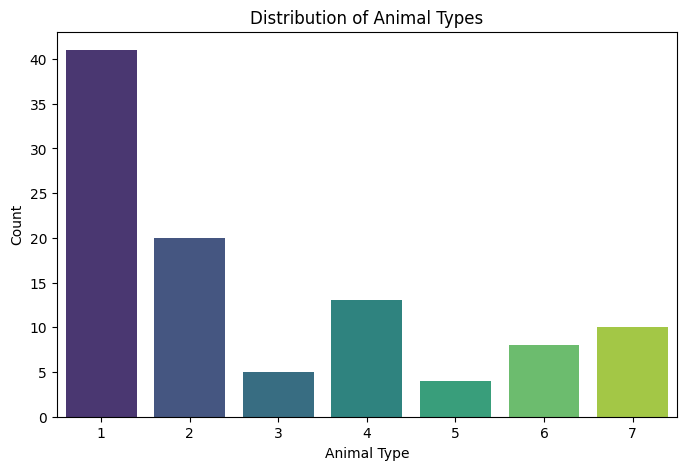

In [5]:
# Countplot of animal types
plt.figure(figsize=(8, 5))
sns.countplot(x=df["type"], palette="viridis")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Types")
plt.show()

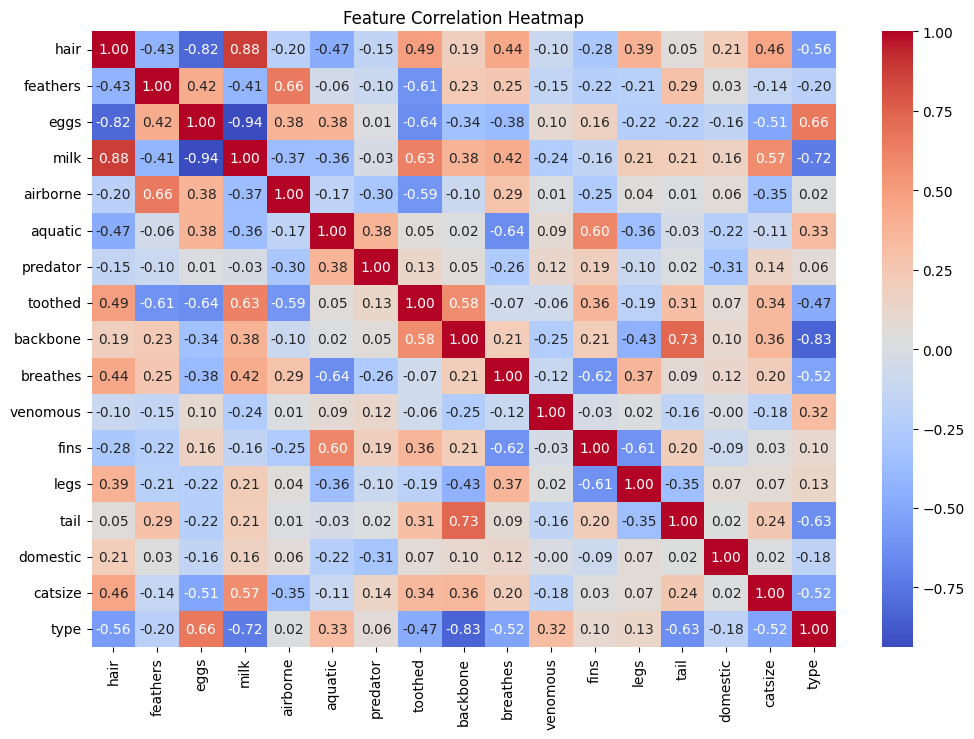

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=["animal name"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

# 2. Data Preprocessing

In [7]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

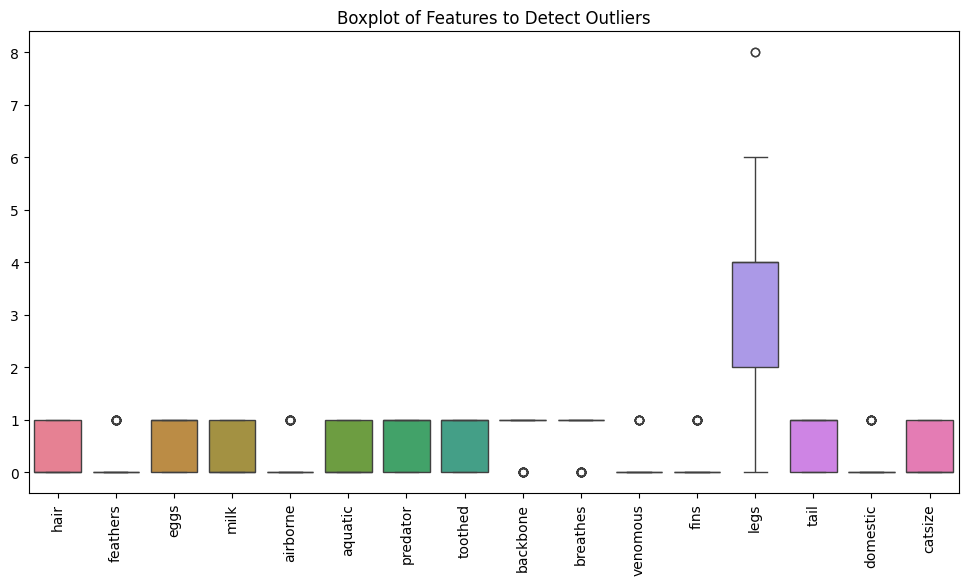

In [8]:
# Check for outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["animal name", "type"]))
plt.xticks(rotation=90)
plt.title("Boxplot of Features to Detect Outliers")
plt.show()

In [9]:
# Handling outliers in 'legs' column using capping (Winsorization)
Q1 = df["legs"].quantile(0.25)
Q3 = df["legs"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
Q1, Q3, IQR, lower_bound, upper_bound

(np.float64(2.0),
 np.float64(4.0),
 np.float64(2.0),
 np.float64(-1.0),
 np.float64(7.0))

In [11]:
# Capping outliers
df["legs"] = df["legs"].clip(lower=lower_bound, upper=upper_bound)

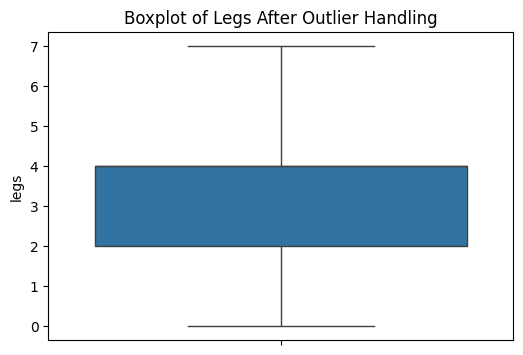

In [12]:
# Rechecking the boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["legs"])
plt.title("Boxplot of Legs After Outlier Handling")
plt.show()

# 3. Split the Dataset

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
# Drop the animal name column (not useful for classification)
df = df.drop(columns=["animal name"])
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [15]:
# Define features and target variable
X = df.drop(columns=["type"])
y = df["type"]
X, y

(     hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 0       1         0     0     1         0        0         1        1   
 1       1         0     0     1         0        0         0        1   
 2       0         0     1     0         0        1         1        1   
 3       1         0     0     1         0        0         1        1   
 4       1         0     0     1         0        0         1        1   
 ..    ...       ...   ...   ...       ...      ...       ...      ...   
 96      1         0     0     1         0        0         0        1   
 97      1         0     1     0         1        0         0        0   
 98      1         0     0     1         0        0         1        1   
 99      0         0     1     0         0        0         0        0   
 100     0         1     1     0         1        0         0        0   
 
      backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
 0           1         1         0  

In [16]:
# Split into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_test, y_train, y_test

(    hair  feathers  eggs  milk  airborne  aquatic  predator  toothed  \
 13     0         0     1     0         0        0         1        0   
 90     0         0     1     0         0        0         0        0   
 33     0         1     1     0         1        1         1        0   
 61     0         0     1     0         0        1         1        1   
 18     0         0     1     0         0        1         1        1   
 ..   ...       ...   ...   ...       ...      ...       ...      ...   
 88     0         0     1     0         0        0         0        0   
 52     0         0     1     0         0        1         1        1   
 56     0         1     1     0         0        0         0        0   
 32     1         0     0     1         0        0         0        1   
 93     1         0     0     1         1        0         0        1   
 
     backbone  breathes  venomous  fins  legs  tail  domestic  catsize  
 13         0         0         0     0     0    

In [17]:
# Display the shape of the datasets
X_train.shape, X_test.shape

((80, 16), (21, 16))

# 4. Implemented K-Nearest Neighbors (KNN)
# 5. Chose an Appropriate Distance Metric and Value for K

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [19]:
# Define KNN classifier with an appropriate K value (e.g., K=5) and Euclidean distance metric
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn

KNeighborsClassifier(metric='euclidean')

In [20]:
# Train the classifier
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [21]:
# Make predictions on the test set
y_pred = knn.predict(X_test)
y_pred

array([5, 2, 4, 2, 1, 1, 4, 6, 1, 4, 7, 1, 1, 7, 1, 2, 4, 6, 1, 1, 2])

# 6. Evaluated the Classifier's Performance

In [22]:
# Evaluate the classifier's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

accuracy, precision, recall, f1

(0.9523809523809523,
 0.9166666666666666,
 0.9523809523809523,
 0.9319727891156462)

# 7. Visualized the Decision Boundaries

In [23]:
from sklearn.decomposition import PCA
import numpy as np

In [24]:
# Reduce feature dimensions to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca, X_train_pca, X_test_pca

(PCA(n_components=2),
 array([[-2.63765743, -0.95381722],
        [ 1.23611751, -0.50163124],
        [-0.8751951 , -1.12307411],
        [-3.02957929, -0.22877012],
        [-3.01548786,  0.10832339],
        [-0.76355087,  1.32965896],
        [-2.99922932, -0.24295854],
        [-3.02957929, -0.22877012],
        [-0.71574623, -1.02928059],
        [ 1.39454242,  1.20244254],
        [-0.45106373,  1.25382267],
        [ 1.39454242,  1.20244254],
        [-0.72633326, -0.72025552],
        [-2.73945581, -1.09827866],
        [-0.74042469, -1.05734902],
        [ 1.39454242,  1.20244254],
        [ 1.39454242,  1.20244254],
        [ 1.39454242,  1.20244254],
        [ 3.06014668, -1.52403558],
        [-2.99922932, -0.24295854],
        [ 1.39454242,  1.20244254],
        [-0.5232739 ,  1.01459557],
        [-3.02957929, -0.22877012],
        [ 1.15474053, -0.42161665],
        [ 1.42489238,  1.18825412],
        [ 1.45833266,  1.06231928],
        [ 1.43547942,  0.87922905],
      

In [25]:
# Train KNN on reduced dimensions
knn_pca = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_pca.fit(X_train_pca, y_train)

KNeighborsClassifier(metric='euclidean')

In [26]:
# Create a mesh grid for decision boundary visualization
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

In [27]:
x_min, x_max

(np.float64(-4.0295792855815), np.float64(5.225416400518462))

In [28]:
y_min, y_max

(np.float64(-2.5606331308451997), np.float64(2.352970648520764))

In [29]:
xx, yy

(array([[-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ],
        [-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ],
        [-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ],
        ...,
        [-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ],
        [-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ],
        [-4.02957929, -3.98307177, -3.93656425, ...,  5.13240137,
          5.17890888,  5.2254164 ]], shape=(200, 200)),
 array([[-2.56063313, -2.56063313, -2.56063313, ..., -2.56063313,
         -2.56063313, -2.56063313],
        [-2.53594165, -2.53594165, -2.53594165, ..., -2.53594165,
         -2.53594165, -2.53594165],
        [-2.51125018, -2.51125018, -2.51125018, ..., -2.51125018,
         -2.51125018, -2.51125018],
        ...,
        [ 2.3035877 ,  2.3035877 ,  

In [30]:
# Predict on the mesh grid
Z = knn_pca.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z

array([[7, 7, 7, ..., 6, 6, 6],
       [7, 7, 7, ..., 6, 6, 6],
       [7, 7, 7, ..., 6, 6, 6],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], shape=(200, 200))

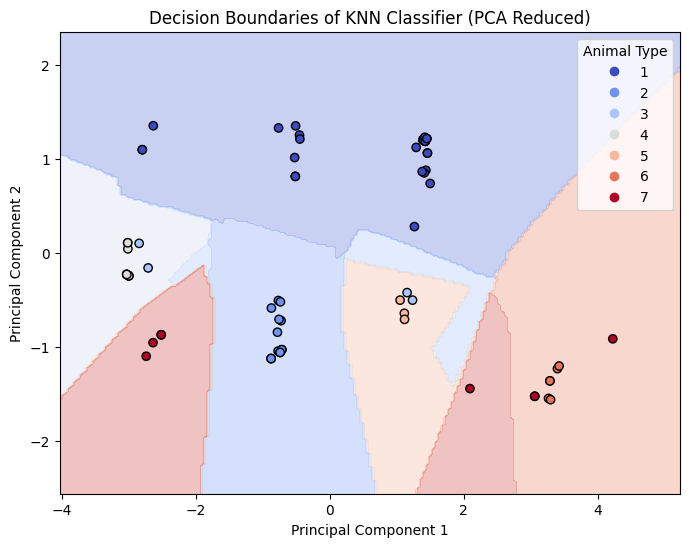

In [31]:
# Plot decision boundaries
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap="coolwarm", edgecolor="k")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Decision Boundaries of KNN Classifier (PCA Reduced)")
plt.legend(*scatter.legend_elements(), title="Animal Type")
plt.show()

# Interview Questions:

### 1. What are the key hyperparameters in KNN?

- k (Number of Neighbors) → Controls model complexity (low k = overfitting, high k = underfitting).

- Distance Metric → Defines how distances are measured (e.g., Euclidean, Manhattan).

- Weighting Scheme:

Uniform → All neighbors have equal influence.

Distance-based → Closer neighbors have more influence.

- Algorithm for Nearest Neighbor Search:

Brute-force → Computes distance to all points (slow for large datasets).

KD-Tree → Efficient for low-dimensional data.

Ball-Tree → Works well in high-dimensional spaces.

### 2. What distance metrics can be used in KNN?

- Euclidean Distance → Most common, calculates straight-line distance.

- Manhattan Distance → Measures absolute differences (like city blocks).

- Minkowski Distance → General form of Euclidean & Manhattan (p=1 is Manhattan, p=2 is Euclidean).

- Hamming Distance → Used for categorical variables (counts differences).

- Cosine Similarity → Measures angle between vectors (used in text analysis).